## Predict Number using SVM (MNIST Dataset)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
df = pd.read_csv('mnist_train.csv')

In [3]:
df.shape

(59999, 785)

In [4]:
df.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.isnull().sum().head(10) #checking for null

5      0
0      0
0.1    0
0.2    0
0.3    0
0.4    0
0.5    0
0.6    0
0.7    0
0.8    0
dtype: int64

In [6]:
data = df.values
type(data)

numpy.ndarray

In [7]:
X = data[:,1:]
Y = data[:,0]

In [8]:
print(X.shape,Y.shape)

(59999, 784) (59999,)


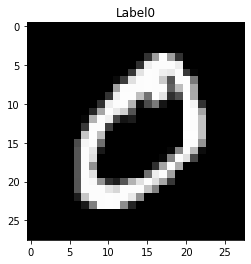

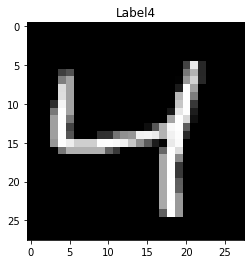

In [9]:
def drawImage(X,Y,i):
    plt.imshow(X[i].reshape(28,28),cmap='gray')
    plt.title('Label'+str(Y[i]))
    plt.show()
    
for i in range(2):    
    drawImage(X,Y,i)

In [10]:
# to split the dataset using sklearn

from sklearn.model_selection import train_test_split

XT,Xt,YT,Yt = train_test_split(X,Y,test_size=0.2,random_state=1)  #random_state is like seed, to get same dataset everytime
print(XT.shape, YT.shape)
print(Xt.shape,Yt.shape)

(47999, 784) (47999,)
(12000, 784) (12000,)


In [11]:
XT = XT.astype('float64')
Xt = Xt.astype('float64')

In [12]:
XT/=255
Xt/=255

In [13]:
# model
model = SVC(kernel='rbf')

# fit
model.fit(XT, YT)

# predict
y_pred = model.predict(Xt)

In [14]:
# accuracy
print("accuracy:", accuracy_score(y_true=Yt, y_pred=y_pred), "\n")

# confusion matrix
print(confusion_matrix(y_true=Yt, y_pred=y_pred))

accuracy: 0.97825 

[[1183    1    2    1    0    2    4    1    3    0]
 [   0 1290    4    0    4    0    1    0    1    1]
 [   3    1 1198    4    1    0    1    5    5    0]
 [   0    2   12 1180    1    9    0    4    9    5]
 [   0    3    3    0 1142    0    6    3    2   13]
 [   4    0    3    8    5 1078    6    0    5    3]
 [   4    1    0    0    3    1 1162    0    3    0]
 [   0    6    8    1    8    0    0 1222    1    6]
 [   1    5    4    5    4    6    3    2 1173    3]
 [   2    3    0    4    8    5    1    9    3 1111]]


In [15]:
img = cv2.imread('test-image.jpg',cv2.IMREAD_GRAYSCALE)
image = cv2.resize(img, (28,28))  #Resize the data to the MNIST dimensions
image = image.astype('float64')
image = image.reshape(1,-1)
image = 255-image
image /= 255

In [16]:
image

array([[0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.03529412,
        0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.03529412,
        0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.03529412,
        0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.03529412,
        0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.03529412,
        0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.03529412,
        0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.03529412,
        0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.03529412,
        0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.03529412,
        0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.03529412,
        0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.03529412,
        0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.03529412,
        0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.03529412,
        0.03529412, 0.03529412, 0.03529412, 0.03529412, 0.99607843,
        1.        , 1.        , 1.        , 1.  

<function matplotlib.pyplot.show(close=None, block=None)>

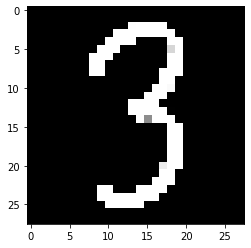

In [17]:
plt.imshow(image.reshape(28,28),cmap='gray')
plt.show

In [18]:
model.predict(image) #testing our result

array([3], dtype=int64)

### Save model for the future use

In [19]:
import joblib #to save our model

In [20]:
joblib.dump(model, 'model.pkl') #creating .pkl file

['model.pkl']

In [21]:
m = joblib.load('model.pkl')

In [22]:
m.predict(image)

array([3], dtype=int64)